# Perkenalan

In [24]:
'''
=================================================
GRADED CHALLENGE 05 PHASE 1

Nama  : Dendy Dwinanda
Batch : RMT-030

Program ini dibuat untuk melakukan Prediksi kemampuan bayar kostumer yang 
untuk mengavaluasi kinerja pembayaran pemilik credit card dengan machine 
learning. Machine Learning dibuat berdasarkan pembelajaran model data 
peminjaman yang sudah ada sebelumnya dengan mempertimbangkan beberapa aspek 
didalamnya. Hasil Prediksi yang muncul pada model machine learning dapat 
menjadi pertimbangan untuk keputusan berikutnya.

Analisis SMART :
- Spesific = Membuat machine learning untuk mengevaluasi kinerja keuangan 
pemegang kartu kredit ditengah peningkatan pengguna kartu kredit.

- Measurable = Membuat analisa automatisasi terhadap kinerja keuangan pemegang 
kartu kredit.

- Achievable = Menciptakan machine learning untuk mempelajari data yang kinerja 
keuangan untuk mengevaluasi kemungkinan gagal bayar secara automatisasi.

- Relevant = Membantu proses evaluasi kinerja kartu kredit untuk 
meminimalsir tingkat gagal bayar.

- Time-bound = Machine learning akan dievaluasi dalam 3 bulan kedepan untuk 
meningkatkan akurasi analisa.

=================================================
'''

'\n=================================================\nGRADED CHALLENGE 05 PHASE 1\n\nNama  : Dendy Dwinanda\nBatch : RMT-030\n\nProgram ini dibuat untuk melakukan Prediksi kemampuan bayar kostumer yang \nuntuk mengavaluasi kinerja pembayaran pemilik credit card dengan machine \nlearning. Machine Learning dibuat berdasarkan pembelajaran model data \npeminjaman yang sudah ada sebelumnya dengan mempertimbangkan beberapa aspek \ndidalamnya. Hasil Prediksi yang muncul pada model machine learning dapat \nmenjadi pertimbangan untuk keputusan berikutnya.\n\nAnalisis SMART :\n- Spesific = Membuat machine learning untuk mengevaluasi kinerja keuangan \npemegang kartu kredit ditengah peningkatan pengguna kartu kredit.\n\n- Measurable = Membuat analisa automatisasi terhadap kinerja keuangan pemegang \nkartu kredit.\n\n- Achievable = Menciptakan machine learning untuk mempelajari data yang kinerja \nkeuangan untuk mengevaluasi kemungkinan gagal bayar secara automatisasi.\n\n- Relevant = Membantu pro

# Query SQL

In [25]:
'''
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM bigquery-public-data.ml_datasets.credit_card_default
LIMIT 59910;

SELECT CAST(sex AS INT64) as sex,
CAST(education_level AS INT64) as education_level,
CAST(marital_status AS INT64) as marital_status,
CAST(pay_5 AS FLOAT64) as pay_5,
CAST(pay_6 AS FLOAT64) as pay_6,
CAST(default_payment_next_month AS INT64) as default_payment_next_month
from bigquery-public-data.ml_datasets.credit_card_default;
'''

'\nSELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month\nFROM bigquery-public-data.ml_datasets.credit_card_default\nLIMIT 59910;\n\nSELECT CAST(sex AS INT64) as sex,\nCAST(education_level AS INT64) as education_level,\nCAST(marital_status AS INT64) as marital_status,\nCAST(pay_5 AS FLOAT64) as pay_5,\nCAST(pay_6 AS FLOAT64) as pay_6,\nCAST(default_payment_next_month AS INT64) as default_payment_next_month\nfrom bigquery-public-data.ml_datasets.credit_card_default;\n'

# Import Libraries

In [26]:
# import libraries yang dibutuhkan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
import pickle
import json

# Data Loading

In [27]:
# data loading
data = pd.read_csv('P1G5_Set_1_dendy_dwinanda.csv')
data.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [28]:
# menampilkan data tail
data.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [29]:
# menampilkan data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [30]:
# menampilkan data tiap kolom berdasarkan count, mean, std, min, max, median, dan iqr
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [31]:
# replace unknown value at education column to other

data['education_level'].replace(to_replace=0, value=4, inplace=True)
data['education_level'].replace(to_replace=5, value=4, inplace=True)
data['education_level'].replace(to_replace=6, value=4, inplace=True)


C:\Users\dwina\AppData\Local\Temp\ipykernel_4528\1061028678.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education_level'].replace(to_replace=0, value=4, inplace=True)
C:\Users\dwina\AppData\Local\Temp\ipykernel_4528\1061028678.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [32]:
# replace unknown value at marital status column to other

data['marital_status'].replace(to_replace=0, value=3, inplace=True )

C:\Users\dwina\AppData\Local\Temp\ipykernel_4528\401371482.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['marital_status'].replace(to_replace=0, value=3, inplace=True )


# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'default payment')

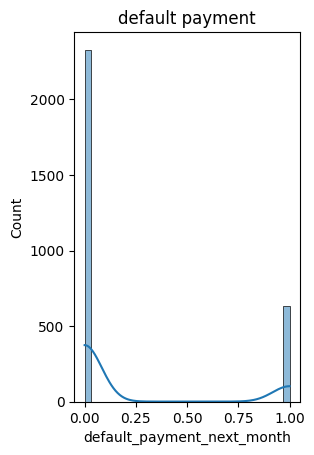

In [33]:
# ratio bayar dan gagal bayar pemilik credit card

plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(data.default_payment_next_month,kde=True,bins=30)
plt.title('default payment')


Text(0.5, 1.0, 'Limit Balance')

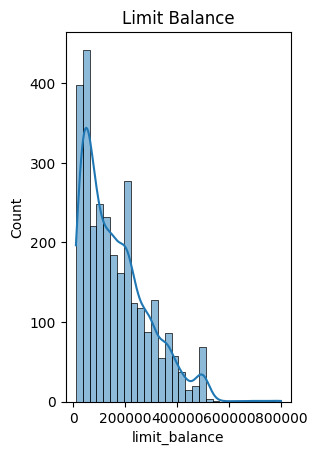

In [34]:
# Rentan Limit pemilik credit card
plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(data.limit_balance,kde=True,bins=30)
plt.title('Limit Balance')

Text(0.5, 1.0, 'Payer Gender')

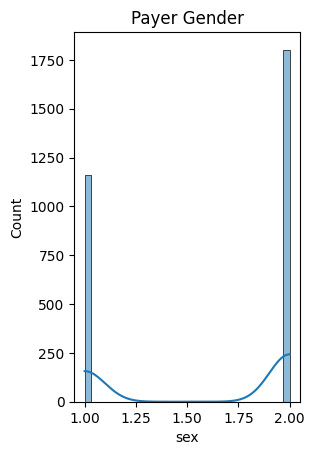

In [35]:
# Gender pemilik credit card
plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(data.sex,kde=True,bins=30)
plt.title('Payer Gender')

Text(0.5, 1.0, 'Education Level')

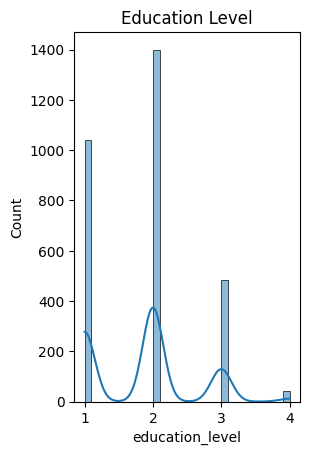

In [36]:
# status pendidikan pemilik credit card
plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(data.education_level,kde=True,bins=30)
plt.title('Education Level')

Text(0.5, 1.0, 'Status Pernikahan')

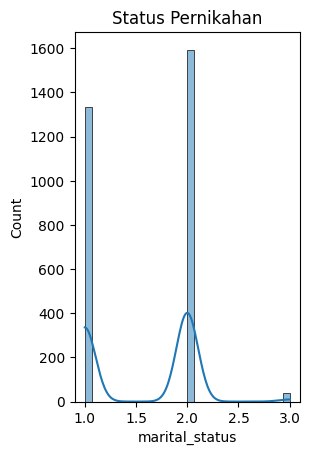

In [37]:
# Gender pemilik credit card
plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(data.marital_status,kde=True,bins=30)
plt.title('Status Pernikahan')

Insight :
- Menampilkan persebaran data persebaran pembayaran dan gagal bayar.
- Rata-rata nilai limit balance ada pada 0 sampai 200000.
- Pemilik credit card didominasi perempuan.
- Pemilik credit card tebanyak ada pada education level university
- Pemilik credit card tertinggi ada pada status single.

# Feature Engineering

In [38]:
# memisahkan x dan y sebagai target yaitu default_payment_next_month

x = data.drop(['default_payment_next_month'], axis=1)
y = data['default_payment_next_month']

x.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,4,1,54.0,0.0,0.0,0.0,0.0,0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,4,2,22.0,0.0,0.0,0.0,0.0,0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0


## Split Train and Test

In [39]:
# splitting antara x_train dan x_test dari data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

print('Train Size :', x_train.shape)
print('Test Size :', x_test.shape)
x_train.head()

Train Size : (2372, 23)
Test Size : (593, 23)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
345,90000.0,1,1,1,38.0,2.0,0.0,0.0,0.0,0,...,87343.0,89786.0,67803.0,69324.0,3103.0,3500.0,4200.0,2426.0,2613.0,3000.0
970,260000.0,2,2,1,42.0,0.0,0.0,0.0,0.0,0,...,49512.0,18657.0,33296.0,32622.0,5000.0,2655.0,800.0,15000.0,0.0,10000.0
356,50000.0,2,1,2,28.0,2.0,2.0,0.0,0.0,0,...,20347.0,21354.0,21630.0,23123.0,0.0,1646.0,1653.0,929.0,2000.0,0.0
1571,360000.0,1,1,2,30.0,-1.0,-1.0,-1.0,-1.0,0,...,6085.0,90872.0,81622.0,11576.0,28057.0,6179.0,90872.0,0.0,11576.0,8718.0
2390,140000.0,2,2,1,35.0,-1.0,-1.0,-1.0,-1.0,-1,...,6410.0,4246.0,326.0,326.0,326.0,6736.0,4246.0,326.0,326.0,502.0


In [40]:
# define data categorical dan numeric

# melakukan seleksi data kategorikal
x_train_kat = x_train.select_dtypes(include=['object'])
x_test_kat = x_test.select_dtypes(include=['object'])

# melakukan seleksi data numerikal
x_train_num = x_train.select_dtypes(exclude=['object'])
x_test_num = x_test.select_dtypes(exclude=['object'])

num_cols = list(x.select_dtypes(exclude='object').columns)
num_cols

['limit_balance',
 'sex',
 'education_level',
 'marital_status',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

In [41]:
x_train_num

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
345,90000.0,1,1,1,38.0,2.0,0.0,0.0,0.0,0,...,87343.0,89786.0,67803.0,69324.0,3103.0,3500.0,4200.0,2426.0,2613.0,3000.0
970,260000.0,2,2,1,42.0,0.0,0.0,0.0,0.0,0,...,49512.0,18657.0,33296.0,32622.0,5000.0,2655.0,800.0,15000.0,0.0,10000.0
356,50000.0,2,1,2,28.0,2.0,2.0,0.0,0.0,0,...,20347.0,21354.0,21630.0,23123.0,0.0,1646.0,1653.0,929.0,2000.0,0.0
1571,360000.0,1,1,2,30.0,-1.0,-1.0,-1.0,-1.0,0,...,6085.0,90872.0,81622.0,11576.0,28057.0,6179.0,90872.0,0.0,11576.0,8718.0
2390,140000.0,2,2,1,35.0,-1.0,-1.0,-1.0,-1.0,-1,...,6410.0,4246.0,326.0,326.0,326.0,6736.0,4246.0,326.0,326.0,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,360000.0,2,1,2,27.0,1.0,-2.0,-1.0,-1.0,-1,...,830.0,0.0,1271.0,179.0,0.0,830.0,0.0,1271.0,179.0,1970.0
343,220000.0,1,1,1,48.0,2.0,0.0,0.0,0.0,0,...,201852.0,169115.0,172169.0,162402.0,10000.0,9020.0,6000.0,5500.0,6000.0,5500.0
2240,100000.0,1,1,2,26.0,-1.0,-1.0,-1.0,-1.0,-1,...,4056.0,10782.0,3187.0,18515.0,4503.0,4066.0,10900.0,3196.0,18543.0,3215.0
899,180000.0,2,2,1,38.0,0.0,0.0,0.0,0.0,0,...,151651.0,159019.0,123022.0,126075.0,7011.0,5657.0,10372.0,5000.0,5000.0,5000.0


## Data Numeric

### Handling Missing Value

In [42]:
for column in x_train_num:
    null_count = x_train_num[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null values.")

Column 'limit_balance' has 0 null values.
Column 'sex' has 0 null values.
Column 'education_level' has 0 null values.
Column 'marital_status' has 0 null values.
Column 'age' has 0 null values.
Column 'pay_0' has 0 null values.
Column 'pay_2' has 0 null values.
Column 'pay_3' has 0 null values.
Column 'pay_4' has 0 null values.
Column 'pay_5' has 0 null values.
Column 'pay_6' has 0 null values.
Column 'bill_amt_1' has 0 null values.
Column 'bill_amt_2' has 0 null values.
Column 'bill_amt_3' has 0 null values.
Column 'bill_amt_4' has 0 null values.
Column 'bill_amt_5' has 0 null values.
Column 'bill_amt_6' has 0 null values.
Column 'pay_amt_1' has 0 null values.
Column 'pay_amt_2' has 0 null values.
Column 'pay_amt_3' has 0 null values.
Column 'pay_amt_4' has 0 null values.
Column 'pay_amt_5' has 0 null values.
Column 'pay_amt_6' has 0 null values.


Insight :
- Tidak ada data missing di dalam x_train_num

In [43]:
for column in x_test_num:
    null_count = x_test_num[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null values.")

Column 'limit_balance' has 0 null values.
Column 'sex' has 0 null values.
Column 'education_level' has 0 null values.
Column 'marital_status' has 0 null values.
Column 'age' has 0 null values.
Column 'pay_0' has 0 null values.
Column 'pay_2' has 0 null values.
Column 'pay_3' has 0 null values.
Column 'pay_4' has 0 null values.
Column 'pay_5' has 0 null values.
Column 'pay_6' has 0 null values.
Column 'bill_amt_1' has 0 null values.
Column 'bill_amt_2' has 0 null values.
Column 'bill_amt_3' has 0 null values.
Column 'bill_amt_4' has 0 null values.
Column 'bill_amt_5' has 0 null values.
Column 'bill_amt_6' has 0 null values.
Column 'pay_amt_1' has 0 null values.
Column 'pay_amt_2' has 0 null values.
Column 'pay_amt_3' has 0 null values.
Column 'pay_amt_4' has 0 null values.
Column 'pay_amt_5' has 0 null values.
Column 'pay_amt_6' has 0 null values.


Insight :
- Tidak ada data missing di dalam x_test_num

### Check Distribution

In [44]:
for column in x_train_num:
    skew_columns = x_train_num[column].skew()
    print(f"Column '{column}' has skewed distribution {skew_columns}.")

Column 'limit_balance' has skewed distribution 1.0069027328366256.
Column 'sex' has skewed distribution -0.427937608142054.
Column 'education_level' has skewed distribution 0.4821579170055973.
Column 'marital_status' has skewed distribution -0.000297928554084393.
Column 'age' has skewed distribution 0.7732921922740165.
Column 'pay_0' has skewed distribution 0.9847868292589388.
Column 'pay_2' has skewed distribution 0.8935388037208288.
Column 'pay_3' has skewed distribution 0.8682393043199272.
Column 'pay_4' has skewed distribution 1.0058690068683607.
Column 'pay_5' has skewed distribution 0.9457161005908832.
Column 'pay_6' has skewed distribution 0.8760977902760483.
Column 'bill_amt_1' has skewed distribution 2.5291764998444406.
Column 'bill_amt_2' has skewed distribution 2.4890288010441295.
Column 'bill_amt_3' has skewed distribution 2.5196131693390247.
Column 'bill_amt_4' has skewed distribution 2.441583629187996.
Column 'bill_amt_5' has skewed distribution 2.380401895599399.
Column 

Insight :
- Ditribusi data tiap kolom bervariasi dari normal distribution sampai Skewed Distribution

### Scalling

In [45]:
# Scaling data numeric
scaler = MinMaxScaler()
scaler.fit(x_train_num)

# transfor data x_train dan x_test
x_train_num_scaled = scaler.transform(x_train_num)
x_test_num_scaled = scaler.transform(x_test_num)

x_train_num_scaled

array([[0.10126582, 0.        , 0.        , ..., 0.01200538, 0.00871   ,
        0.00743494],
       [0.3164557 , 1.        , 0.33333333, ..., 0.0742295 , 0.        ,
        0.02478315],
       [0.05063291, 1.        , 0.        , ..., 0.00459728, 0.00666667,
        0.        ],
       ...,
       [0.11392405, 0.        , 0.        , ..., 0.01581583, 0.06181   ,
        0.00796778],
       [0.21518987, 1.        , 0.33333333, ..., 0.02474317, 0.01666667,
        0.01239157],
       [0.36708861, 0.        , 0.33333333, ..., 0.47012015, 0.01333333,
        0.0086741 ]])

# Model Definition

In [46]:
# Train using Logistic Regression

model_logreg = LogisticRegression(penalty='l2')
model_logreg.fit(x_train_num_scaled, y_train)

print('Coefficient : ', model_logreg.coef_)
print('Intercept   : ', model_logreg.intercept_)

Coefficient :  [[-0.9364926   0.08047649 -0.18546379 -0.32993017  0.37922676  4.81582841
   0.93133312  1.03467976  0.12033337  1.1147595   0.89449347 -0.33443473
   0.36910449 -0.44868793 -0.82939874  0.2211806   0.14364084 -0.4053639
  -0.4084449  -1.46246332 -0.58651805 -1.08432884 -0.81700856]]
Intercept   :  [-2.98743259]


Conseptual Problem:
- Coefficirent dalam model logistik regresi menunjukan peluang kontribusi mempengaruhi target atau y.

In [47]:
# Train using KKN classifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_num_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

Conseptual Problem:
- pemilihan K optimal pada KNeighborsClassifier menunjukan jumlah n_neighbors yang digunakan untuk jarak antar data untuk menentukan kelas. k optimal menunjukan jumlah n_neighbors optimal yang digunakan sehinggal data target dengan predict tidak overvit maupun underfit.

In [48]:
# Train using Support Vector Classifier

svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(x_train_num_scaled, y_train)

SVC()

Conseptual Problem:
- kernel merupakan algoritma yang digunakan dalam super vector machine untuk menentukan bentuk transformasi input data kedalam dimensi yang lebih tinggi.

# Model Training

In [49]:
# Model Evaluation - Train Set & Test Set logistic Regression

y_pred_train_logreg = model_logreg.predict(x_train_num_scaled)
y_pred_test_logreg = model_logreg.predict(x_test_num_scaled)

In [50]:
# Model Evaluation - Train Set & Test Set KNeighborsClassifier

y_pred_train_knn = knn.predict(x_train_num_scaled)
y_pred_test_knn = knn.predict(x_test_num_scaled)

In [51]:
# Model Evaluation - Train Set & Test Set Support Vector Classifier

y_pred_train_svc = svm_scaled.predict(x_train_num_scaled)
y_pred_test_svc = svm_scaled.predict(x_test_num_scaled)

# Model Evaluation

## Evaluation Model

In [52]:
# Model Evaluation - Train Set & Test Set model logistic regression

print(classification_report(y_train, y_pred_train_logreg))
print(classification_report(y_test, y_pred_test_logreg))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1874
           1       0.75      0.24      0.37       498

    accuracy                           0.82      2372
   macro avg       0.79      0.61      0.63      2372
weighted avg       0.81      0.82      0.79      2372

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       456
           1       0.77      0.22      0.34       137

    accuracy                           0.80       593
   macro avg       0.79      0.60      0.61       593
weighted avg       0.80      0.80      0.76       593



In [53]:
# Model Evaluation - Train Set & Test Set model knn

print(classification_report(y_train, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1874
           1       0.75      0.26      0.38       498

    accuracy                           0.83      2372
   macro avg       0.79      0.62      0.64      2372
weighted avg       0.81      0.83      0.79      2372

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       456
           1       0.73      0.24      0.36       137

    accuracy                           0.80       593
   macro avg       0.77      0.61      0.62       593
weighted avg       0.79      0.80      0.76       593



In [54]:
# Model Evaluation - Train Set & Test Set model SVC

print(classification_report(y_train, y_pred_train_svc))
print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1874
           1       0.79      0.30      0.44       498

    accuracy                           0.84      2372
   macro avg       0.82      0.64      0.67      2372
weighted avg       0.83      0.84      0.81      2372

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       456
           1       0.69      0.24      0.36       137

    accuracy                           0.80       593
   macro avg       0.75      0.60      0.62       593
weighted avg       0.78      0.80      0.76       593



insight :
- dari berbagai model diatas didapat hasil bahwa model Super Vector Classification memberikan hasil precision, recall dan f1 score yang lebih tinggi untuk memprediksi target pada data train maupun data test dibandingkan dengan model lain.

Conseptual Problem:
- Accuracy : memberikan gambaran seberapa besar nilai prediksi yang benar terhadap target.
- Preccision : memberikan gambaran model memprediksi benar class postif
- Recall : memberikan gambaran model memprediksi benar (True Positif) terhadap semua target sampel yang sebenarnya.
- F1 Score : merupakan nilai rata-rata dari nilai Precision dan Recal.

## Parameter Tunning

### Parameter tunning Logistic Regression

In [55]:
# mendefinisikan hyper parameter yang akan digunakan

penalty = [None, 'l1', 'l2', 'elasticnet']
C = [1, 3, 5, 7, 9]
random_search_params_log = {'penalty': penalty,
                        'C': C}
random_search_params_log

{'penalty': [None, 'l1', 'l2', 'elasticnet'], 'C': [1, 3, 5, 7, 9]}

In [56]:
# memanggil random search untuk menemukan kombinasi terbaik dengan metode random

logreg_random = RandomizedSearchCV(estimator = LogisticRegression(),
                                 param_distributions=random_search_params_log,
                                 n_iter=50,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='f1')
logreg_random.fit(x_train_num_scaled, y_train)

c:\Users\dwina\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\dwina\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dwina\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dwina\miniconda3\lib\site-packages\sklearn\base.py

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [1, 3, 5, 7, 9],
                                        'penalty': [None, 'l1', 'l2',
                                                    'elasticnet']},
                   random_state=46, scoring='f1')

In [57]:
# membuat fungsi logistic regresion dengan parameter terbaik dari hasi uji

logreg_random_best = logreg_random.best_estimator_
logreg_random_best

LogisticRegression(C=1, penalty=None)

F1 Score - Test Set   :  0.4 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       456
           1       0.77      0.27      0.40       137

    accuracy                           0.81       593
   macro avg       0.79      0.62      0.64       593
weighted avg       0.81      0.81      0.78       593
 

Confusion Matrix      : 


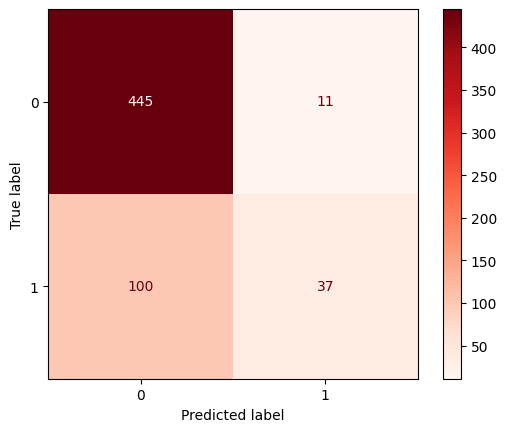

In [58]:
# Check Performance Model against Test-Set logistic Regression

y_pred_test_logreg_random = logreg_random_best.predict(x_test_num_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_logreg_random), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_logreg_random), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_random_best, x_test_num_scaled, y_test, cmap='Reds'))

In [59]:
# menentukan parameter yang akan di uji

grid_search_params = {
    'penalty': [logreg_random.best_params_['penalty']],
    'C': [logreg_random.best_params_['C'] -1,
          logreg_random.best_params_['C'],
          logreg_random.best_params_['C'] + 1,
          logreg_random.best_params_['C'] + 2,
          logreg_random.best_params_['C'] + 3,
          logreg_random.best_params_['C'] + 4,],
}

grid_search_params

{'penalty': [None], 'C': [0, 1, 2, 3, 4, 5]}

In [60]:
# memanggil random search untuk menemukan kombinasi terbaik dengan metode grid

logreg_grid = GridSearchCV(estimator = LogisticRegression(),
                                 param_grid=grid_search_params,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=2,
                                 scoring='f1')
logreg_grid.fit(x_train_num_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\dwina\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dwina\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dwina\miniconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\dwina\miniconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\dwina\miniconda3\lib\site-packag

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5], 'penalty': [None]},
             scoring='f1', verbose=2)

In [61]:
# hasil parameter terbaik dengan metode grid

logreg_grid.best_params_

{'C': 1, 'penalty': None}

In [62]:
# membuat model logistic regresi dengan best parameter 
logreg_grid_best = logreg_grid.best_estimator_
logreg_grid_best

LogisticRegression(C=1, penalty=None)

F1 Score - Test Set   :  0.4 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       456
           1       0.77      0.27      0.40       137

    accuracy                           0.81       593
   macro avg       0.79      0.62      0.64       593
weighted avg       0.81      0.81      0.78       593
 

Confusion Matrix      : 


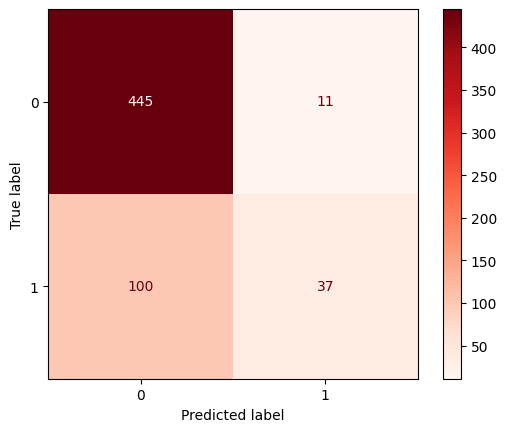

In [63]:
# Check Performance Model against Test-Set

y_pred_test_logreg_grid = logreg_grid_best.predict(x_test_num_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_logreg_grid), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_logreg_grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_grid_best, x_test_num_scaled, y_test, cmap='Reds'))

In [64]:
print('F1 Score - Test Set (default)   : ', f1_score(y_test, y_pred_test_logreg), '\n')
print('F1 Score - Test Set (penalty = none, C = 3)  : ', f1_score(y_test, y_pred_test_logreg_random), '\n')
print('F1 Score - Test Set (penalty = none, C = 2)  : ', f1_score(y_test, y_pred_test_logreg_grid), '\n')

F1 Score - Test Set (default)   :  0.3409090909090909 

F1 Score - Test Set (penalty = none, C = 3)  :  0.4 

F1 Score - Test Set (penalty = none, C = 2)  :  0.4 



Insight :
- Dari hasil parameter tuning diatas dipilih set penalty 'none' dan C = 2 atau 3

### Parameter tunning KNN

In [65]:
# setting hyper parameter KNN

n_neighbors = [int(x) for x in np.linspace(start=1, stop=2000, num = 10)]

random_search_params_knn = {'n_neighbors' : n_neighbors}
random_search_params_knn

{'n_neighbors': [1, 223, 445, 667, 889, 1111, 1333, 1555, 1777, 2000]}

In [66]:
# memanggil fungsi random search untuk mengecek kombinasi parameter terbaik.

knn_random = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                 param_distributions=random_search_params_knn,
                                 n_iter=50,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='f1')
knn_random.fit(x_train_num_scaled, y_train)

c:\Users\dwina\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\dwina\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.40398073 0.00392157 0.         0.         0.         0.
 0.         0.         0.                nan]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 223, 445, 667, 889,
                                                        1111, 1333, 1555, 1777,
                                                        2000]},
                   random_state=46, scoring='f1')

In [67]:
# membual model KNN dengan parameter

knn_random_best = knn_random.best_estimator_
knn_random_best

KNeighborsClassifier(n_neighbors=1)

F1 Score - Test Set   :  0.35918367346938773 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       456
           1       0.41      0.32      0.36       137

    accuracy                           0.74       593
   macro avg       0.61      0.59      0.60       593
weighted avg       0.72      0.74      0.72       593
 

Confusion Matrix      : 


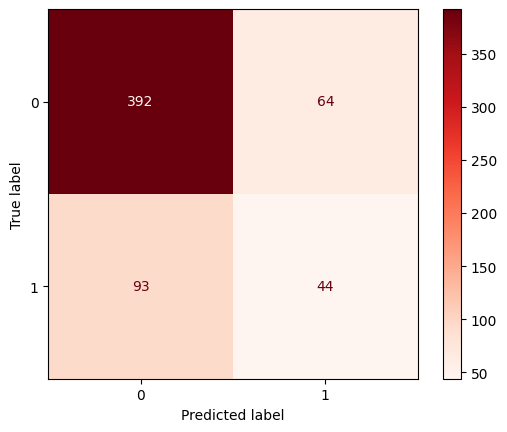

In [68]:
# Check Performance Model against Test-Set model KNN

y_pred_test_knn_random = knn_random_best.predict(x_test_num_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_knn_random), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn_random), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_random_best, x_test_num_scaled, y_test, cmap='Reds'))

Insight :
- dari hyper parameter tunning diatas didapatkan bahwa setting untuk n_neighbors adalah 1

### Parameter tunning SVM

In [69]:
# setting hyper parameter SVM

kernel = ['linear', 'poly', 'rbf']
gamma = [0.0001, 0.001, 0.01, 0.1, 1]

random_search_params_svm = {'kernel' : kernel,
    'gamma' : gamma}
random_search_params_svm

{'kernel': ['linear', 'poly', 'rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}

In [70]:
# memanggil fungsi random search untuk memilih kombinasi parameter terbaik dengan metode random

svm_random = RandomizedSearchCV(estimator=SVC(),
                                 param_distributions=random_search_params_svm,
                                 n_iter=50,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='f1')
svm_random.fit(x_train_num_scaled, y_train)

c:\Users\dwina\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 15 is smaller than n_iter=50. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=46, scoring='f1')

In [71]:
# membuat model SVC dengan parameter pilihan
svm_random_best = svm_random.best_estimator_
svm_random_best

SVC(gamma=1, kernel='poly')

F1 Score - Test Set   :  0.4105263157894737 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       456
           1       0.74      0.28      0.41       137

    accuracy                           0.81       593
   macro avg       0.78      0.63      0.65       593
weighted avg       0.80      0.81      0.78       593
 

Confusion Matrix      : 


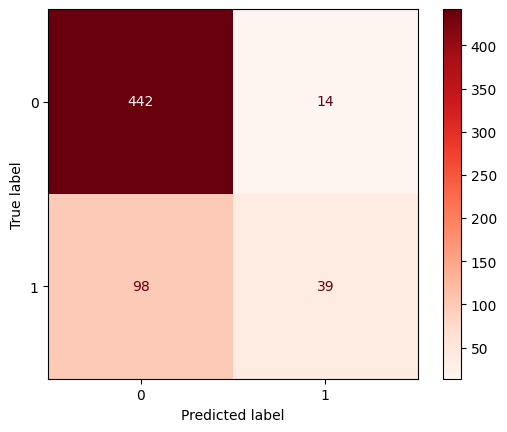

In [72]:
# Check Performance Model against Test-Set support vector classifier

y_pred_test_svm_random = svm_random_best.predict(x_test_num_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svm_random), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svm_random), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_random_best, x_test_num_scaled, y_test, cmap='Reds'))

Insight :
- dari seting parameter tunning diatas didapat model yang disarankan ada apada setting gamma = 1 dan kernel = poly.

### Pilihan Model dan Hyper Parameter

In [73]:
# hasil F1 score sebelum parameter tunning
print('F1 Score - Test Set (default) Logistic Regression   : ', f1_score(y_test, y_pred_test_logreg), '\n')
print('F1 Score - Test Set (default) KNeighborsClassifier  : ', f1_score(y_test, y_pred_test_knn), '\n')
print('F1 Score - Test Set (default) SupportVectorClassifier  : ', f1_score(y_test, y_pred_test_svc), '\n')

# hasil F1 score setelah parameter tunning
print('F1 Score - Test Set (C=1, penalty=None) Logistic Regression : ', f1_score(y_test, y_pred_test_logreg_random), '\n')
print('F1 Score - Test Set (C=1, penalty=None) Logistic Regression : ', f1_score(y_test, y_pred_test_logreg_grid), '\n')
print('F1 Score - Test Set (n_neighbors=1) KNeighborsClassifier : ', f1_score(y_test, y_pred_test_knn_random), '\n')
print('F1 Score - Test Set (gamma=1, kernel=poly) SupportVectorClassifier : ', f1_score(y_test, y_pred_test_svm_random), '\n')

F1 Score - Test Set (default) Logistic Regression   :  0.3409090909090909 

F1 Score - Test Set (default) KNeighborsClassifier  :  0.3626373626373626 

F1 Score - Test Set (default) SupportVectorClassifier  :  0.3567567567567568 

F1 Score - Test Set (C=1, penalty=None) Logistic Regression :  0.4 

F1 Score - Test Set (C=1, penalty=None) Logistic Regression :  0.4 

F1 Score - Test Set (n_neighbors=1) KNeighborsClassifier :  0.35918367346938773 

F1 Score - Test Set (gamma=1, kernel=poly) SupportVectorClassifier :  0.4105263157894737 



In [74]:
model_svm = svm_random_best.predict(x_train_num_scaled)

Insight :
- dari hasil f1 score didapat performa terbaik model ada pada model Support Vector Classifier dengan parameter (gamma=1, kernel=poly). Maka dari itu saving yang akan digunakan dalam model ini adalah Support Vector Classifier dengan parameter (gamma=1, kernel=poly).

# Model Saving

In [75]:
# download num_cols, scaler, dan model yang sudah dipilih

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_saving.pkl', 'wb') as file_3:
  pickle.dump(svm_random_best, file_3)

# Model Inference

In [76]:
# memanggil data yang sudah di download

with open('list_num_cols.txt', 'r') as file_1:
  list_num_cols = json.load(file_1)

with open('scaler.pkl', 'rb') as file_2:
  scaler = pickle.load(file_2)

with open('model_saving.pkl', 'rb') as file_3:
  model_svm = pickle.load(file_3)

In [77]:
# membuat data baru untuk diprediksi berdasarkan model yang sudah ada

data_inf = {
    'limit_balance' : 1000000,
    'sex' : 1,
    'education_level' : 2,
    'marital_status' : 1,
    'age' : 35,
    'pay_0' : -1,
    'pay_2' : -1,
    'pay_3' : -1,
    'pay_4' : -1,
    'pay_5' : -1,
    'pay_6' : -1,
    'bill_amt_1' : 2000,
    'bill_amt_2' : 2000,
    'bill_amt_3' : 2000,
    'bill_amt_4' : 2000,
    'bill_amt_5' : 2000,
    'bill_amt_6' : 2000,
    'pay_amt_1' : 2000,
    'pay_amt_2' : 2000,
    'pay_amt_3' : 2000,
    'pay_amt_4' : 2000,
    'pay_amt_5' : 2000,
    'pay_amt_6' : 2000
}

data_inf = pd.DataFrame([data_inf])
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1000000,1,2,1,35,-1,-1,-1,-1,-1,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


In [78]:
#Split categorical and numerical

data_inf_num = data_inf[list_num_cols]
data_inf_num

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1000000,1,2,1,35,-1,-1,-1,-1,-1,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


In [79]:
#Feature Scaling and Encoding

data_inf_scaled = scaler.transform(data_inf_num)
data_inf_final = np.concatenate([data_inf_scaled], axis = 1)
data_inf_final

array([[1.25316456, 0.        , 0.33333333, 0.        , 0.29166667,
        0.1       , 0.11111111, 0.11111111, 0.1       , 0.11111111,
        0.11111111, 0.02165797, 0.11983605, 0.04689868, 0.09081775,
        0.0995215 , 0.14879418, 0.00405385, 0.00162988, 0.01006299,
        0.00989727, 0.00666667, 0.00495663]])

In [80]:
#Predict using model SVC

y_pred_inf = model_svm.predict(data_inf_final)
y_pred_inf

array([0], dtype=int64)

Insight :
- dari data baru yang masuk telah dikondisikan bahwa tidak ada data pembayaran yang telat setiap bulan nya, dengan nilai pembayaran yang sudah ditentukan sebelumnya. hasil model memprediksi [0] dimana prediksi data baru menyatakan bahwa data tersebut tidak ada indikasi gagal bayar.

# Kesimpulan

- Dalam menganalisis perilaku peminjam terjadi kekurangan data pada peminjam yang diindikasikan gagal bayar sehingga dalam permodelan machine learning yang dibuat terjadi nilai prediktif yang kecil terhadap prediksi gagal bayar. Perlu adanya data smooting yang terjadi sebelum permodelan sehingga data tersebut dapat dipelajari maksimal oleh machine learning untuk mendapatkan nilai prediktif tepat bayar dan nilai prediktif yang gagal bayar yang baik.
- Data yang didapat lalu dalam menentukan model terbaik dilakukan penilaian model dengan model evaluasi F1 score dengan membandingkan model logistic regression, KNN dan SVC. lalu dilakukan setting hyper parameter yang terbaik didalam setiap model. Permodelan yang di buat dipilih berdasarkan nilai F1 score yang terbaik yaitu SVC dengan gamma=1 dan kernel='poly'.
- Berdarsarkan data inference yang "diseting" nilai-nilai tepat bayar tanpa keterlambatan model machine learning mampu mendefinisikan dengan tepat.